Details
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                563

/var/folders/_v/d98f54p92dx6bg1c23kxmcwc0000gn/T/ipykernel_85458/2758232276.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged['Gender'] = merged['Gender'].replace({'Male':0, 'Female':1})


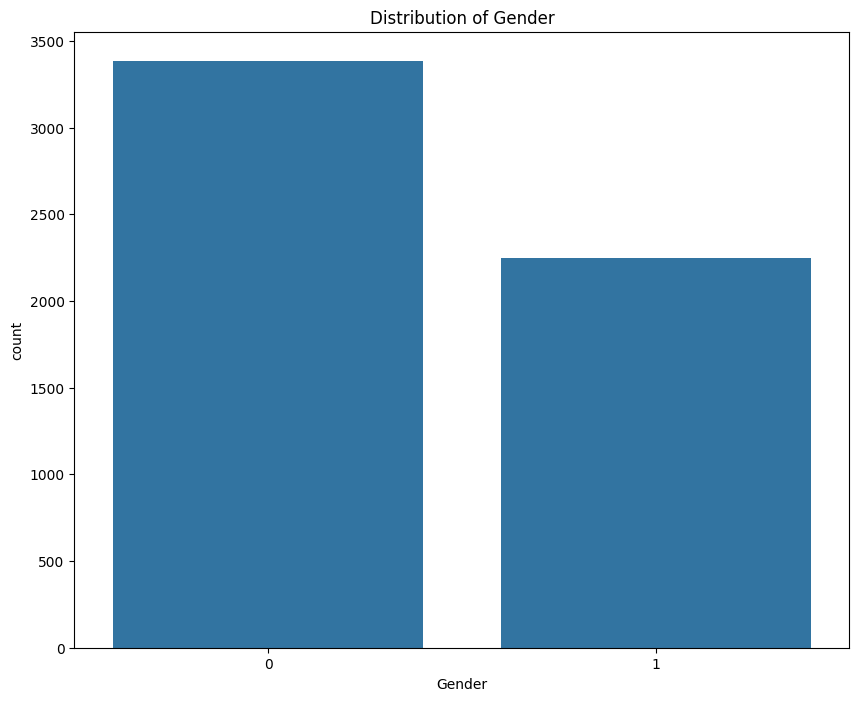

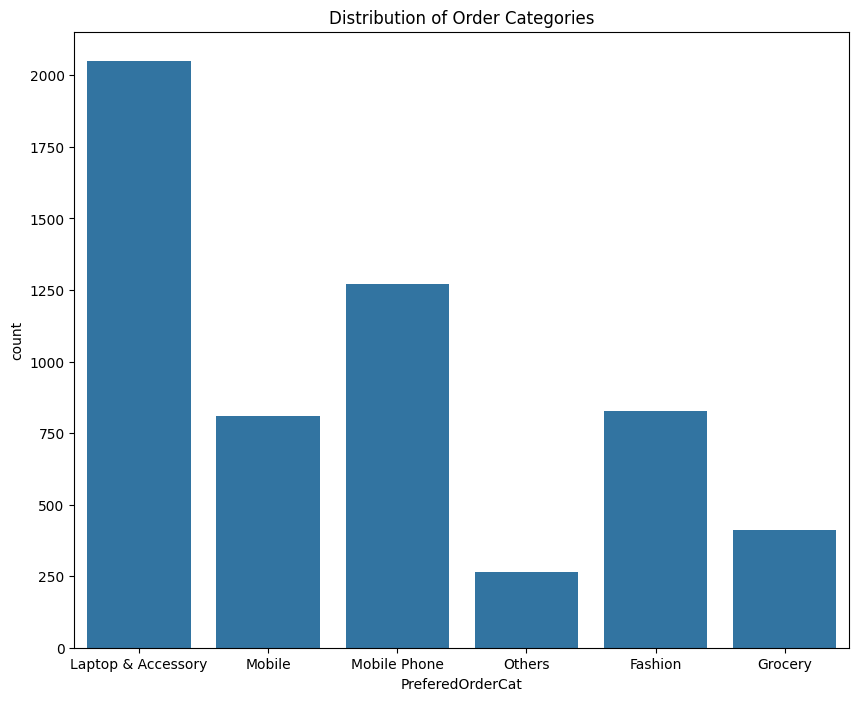

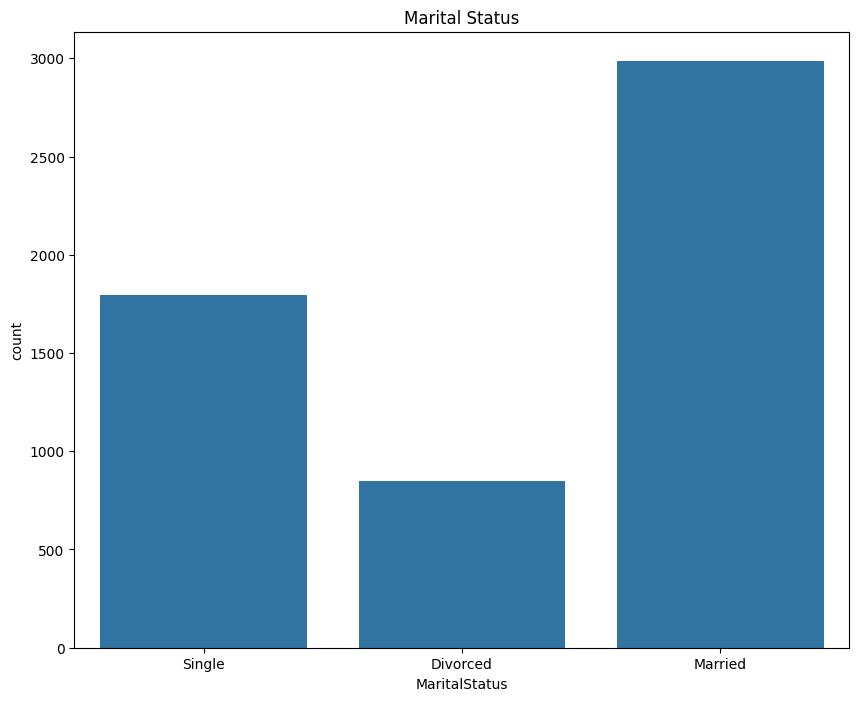

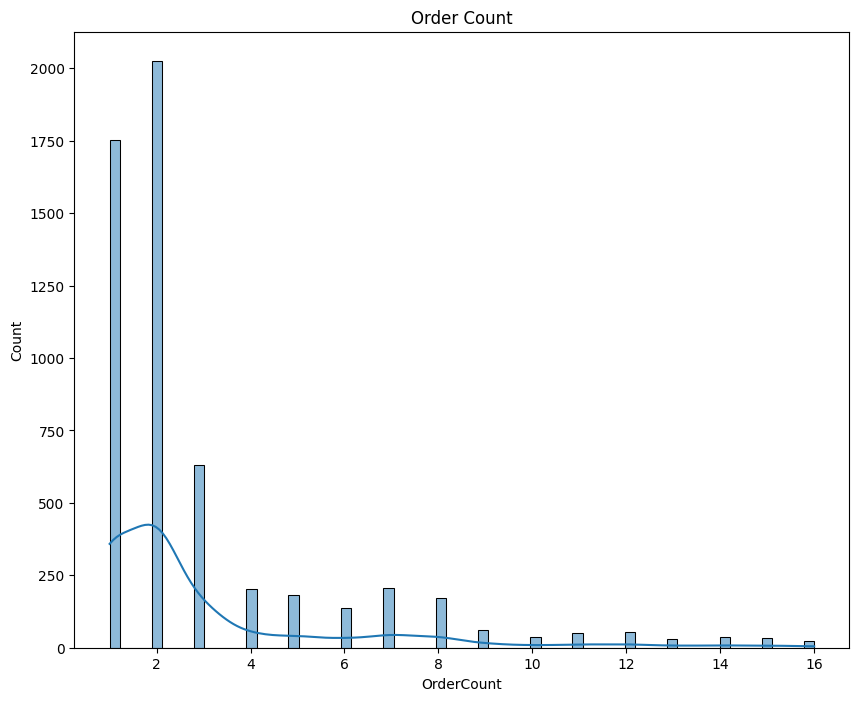

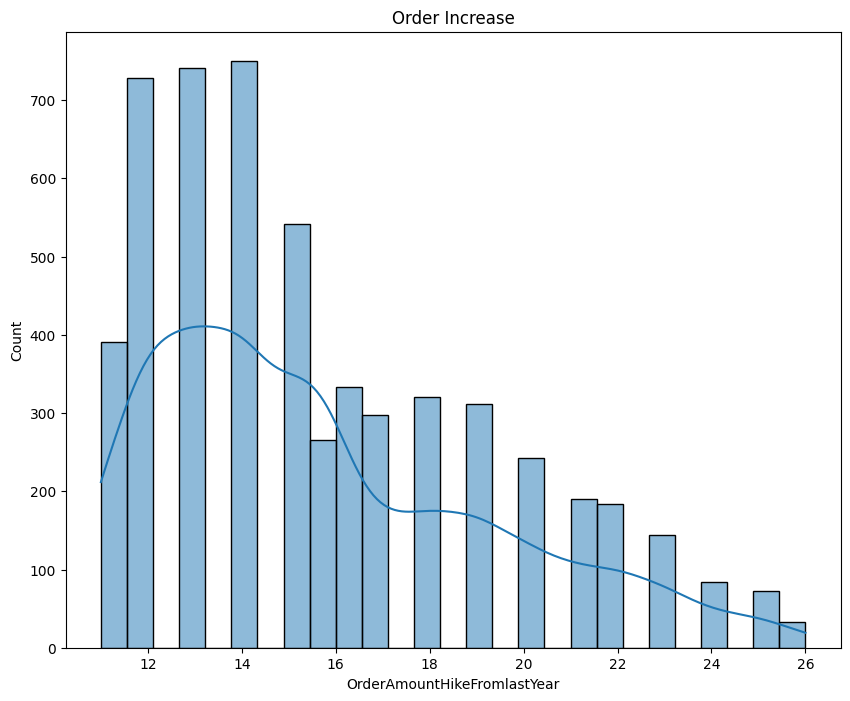

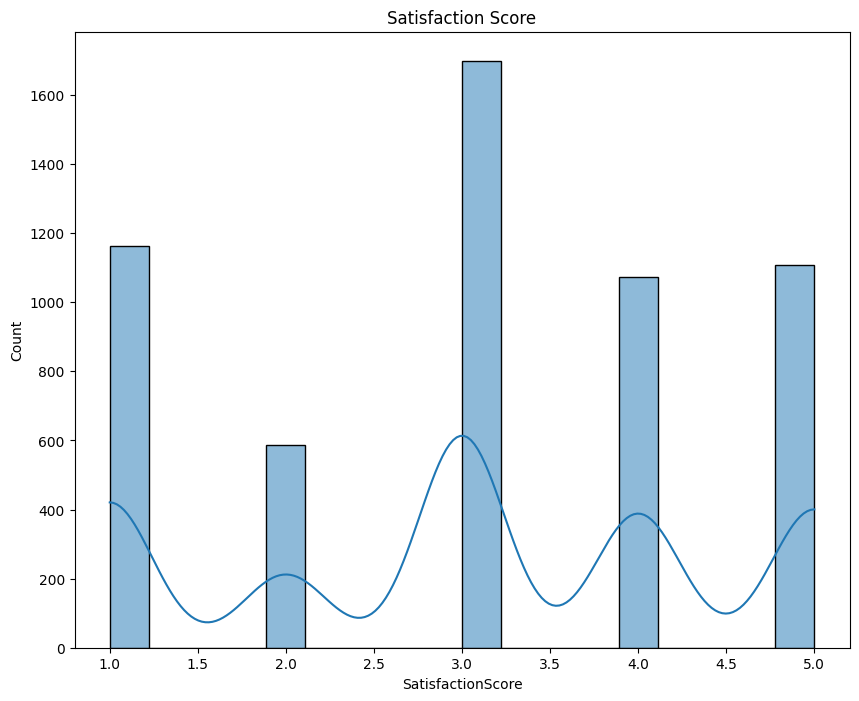

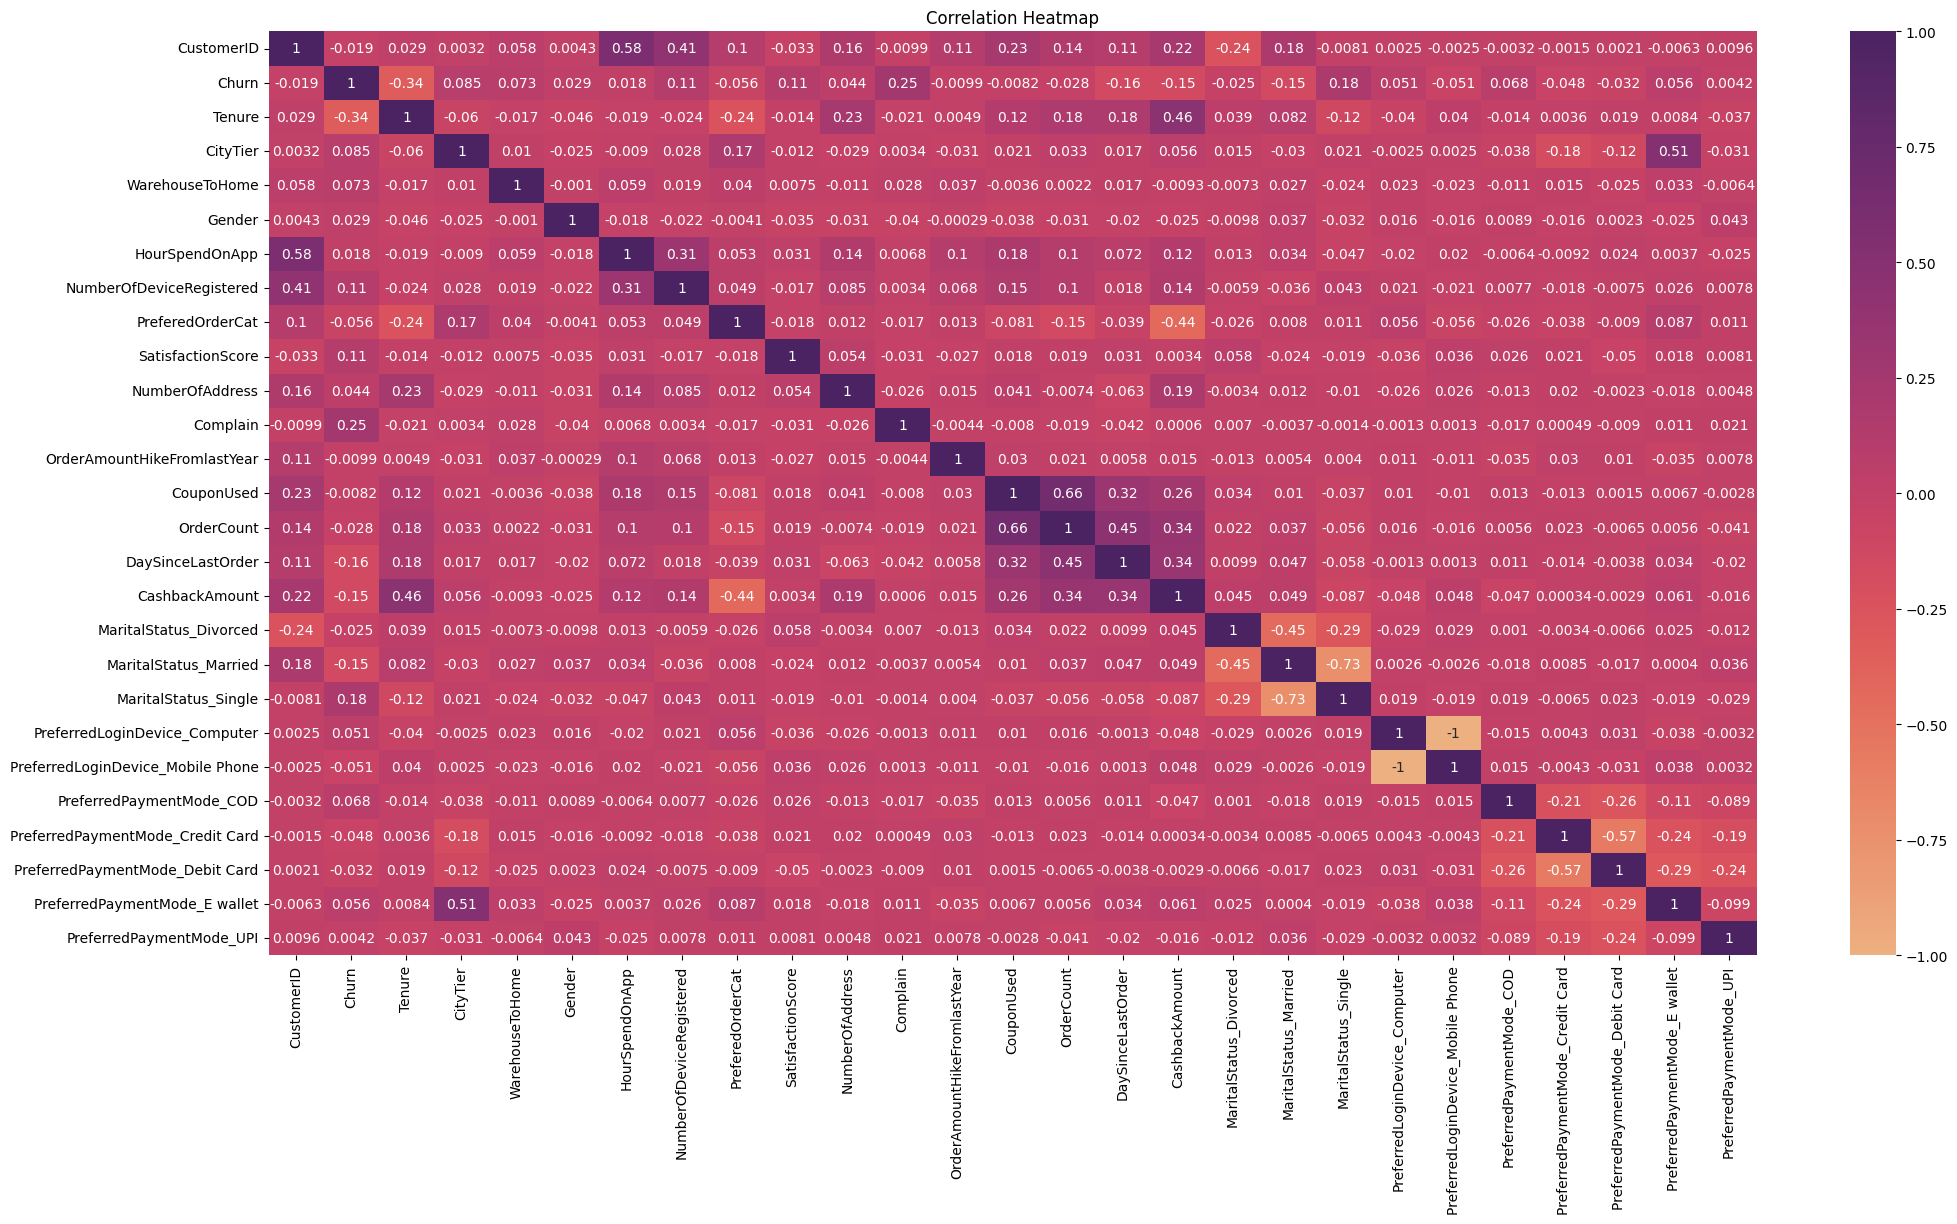


Principle Components
-----------------------------------
Components: 8
-----------------------------------
Mean explained variance: 0.121
-----------------------------------
   explained variance  cumulative
1            0.267282    0.267282
2            0.130843    0.398125
3            0.117031    0.515155
4            0.114947    0.630103
5            0.107060    0.737162
6            0.096642    0.833804
7            0.077649    0.911454
8            0.054042    0.965496

Decision Tree Classifier

Accuracy: 0.7424511545293073
Precision: [0.9375     0.62820513 0.7797619  0.6576087  0.73282443 0.77202073]
Recall: [0.67164179 0.72058824 0.78443114 0.70760234 0.76190476 0.74314214]
F1 Score: [0.7826087  0.67123288 0.78208955 0.68169014 0.74708171 0.75730623]


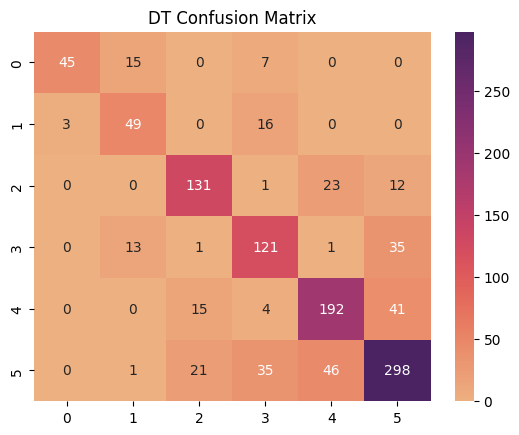


Logistic Regression Classification

Accuracy: 0.783303730017762
Precision: [0.98412698 0.84507042 0.86740331 0.80821918 0.74881517 0.72026432]
Recall: [0.92537313 0.88235294 0.94011976 0.69005848 0.62698413 0.81546135]
 F1 Score: [0.95384615 0.86330935 0.90229885 0.7444795  0.6825054  0.76491228]


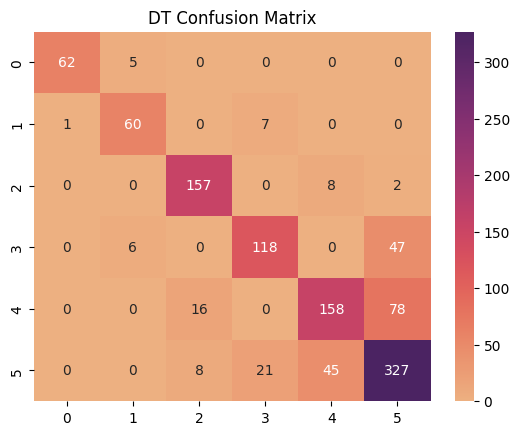


Random Forest

Accuracy: 0.8365896980461812
Precision: [0.92592593 0.76315789 0.86419753 0.8627451  0.89954338 0.79004329]
Recall: [0.74626866 0.85294118 0.83832335 0.77192982 0.78174603 0.91022444]
F1 Score: [0.82644628 0.80555556 0.85106383 0.81481481 0.83651805 0.84588644]


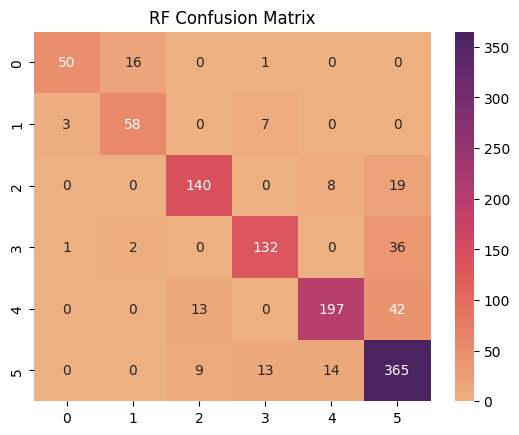

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

import data_tools

from shared import *

raw_data = data_tools.load_raw_data('data/dohtem_ecommerce_customers.csv')

# Quick examination of the data
print('='*35)
print('Details')
print('-'*35)
print(raw_data.info())
print('='*35)
print('Sample')
print('-'*35)
print(raw_data.head(5))
print('='*35)
print('Missing data')
print('-'*35)
print(raw_data.isna().any())
print()
print(raw_data.isna().sum())

# ------------------------------------------------------------------------------
# Pre-process the data
# ------------------------------------------------------------------------------

# Dropping NANs leaves us with 3774 examples. 
# Impute missing values using column mean
filled = data_tools.impute_na(raw_data)

# Impute missing values using grouped column mean.
#filled = data_tools.impute_na(raw_data, grouped=True)

# Merge values. This will reduce the number of values within specific cols.
merged = data_tools.merge_col_vals(filled)

# Binarize the gender column. Do it in place as opposed to introducing new features.
merged['Gender'] = merged['Gender'].replace({'Male':0, 'Female':1})

# Examine a few distributions prior to encoding
# Gender
plt.figure(figsize=(10,8))
sbn.countplot(x='Gender', data=raw_data)
plt.title('Distribution of Gender')
plt.show()

# Order categories
plt.figure(figsize=(10,8))
sbn.countplot(x='PreferedOrderCat', data=merged)
plt.title('Distribution of Order Categories')
plt.show()

# Marital Status
plt.figure(figsize=(10,8))
sbn.countplot(x='MaritalStatus', data=merged)
plt.title('Marital Status')
plt.show()

# Order count
plt.figure(figsize=(10,8))
sbn.histplot(merged['OrderCount'], kde=True)
plt.title('Order Count')
plt.show()

# Order amount increase
plt.figure(figsize=(10,8))
sbn.histplot(merged['OrderAmountHikeFromlastYear'], kde=True)
plt.title('Order Increase')
plt.show()

# Satisfaction
plt.figure(figsize=(10,8))
sbn.histplot(merged['SatisfactionScore'], kde=True)
plt.title('Satisfaction Score')
plt.show()

# Count encode cols
encoded = data_tools.encode_col_count(merged)

# OHE encode cols
encoded = data_tools.encode_col_ohe(encoded)

# Are there correlations in the data?
plt.figure(figsize=(24,12))
sbn.heatmap(encoded.corr(), annot=True, cmap='flare')
plt.title('Correlation Heatmap')
plt.show()

#Split the data
X = encoded[FEATURES]
y = encoded['PreferedOrderCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

num_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
cols = np.arange(num_components) + 1
explained_variance_df = pd.DataFrame(
   [explained_variance, cum_explained_variance], 
    index=['explained variance', 'cumulative'], 
    columns=cols).T

# Calculate mean explained variance
mean_explained_variance = explained_variance_df.iloc[:,0].mean()

# Print PCA results
print('\n'+'='*35)
print('Principle Components')
print('-'*35)
print(f'Components: {num_components}')
print('-'*35)
print(f'Mean explained variance: {round(mean_explained_variance,3)}')
print('-'*35)
print(explained_variance_df.head(20))

model_dt = DecisionTreeClassifier(random_state=27)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, pred_dt) 
precision_dt = precision_score(y_test, pred_dt, average=None) 
recall_dt = recall_score(y_test, pred_dt, average=None) 
f1_dt = f1_score(y_test, pred_dt, average=None) 
cm_dt = confusion_matrix(y_test, pred_dt)

# Print DT eval
print('\n'+'='*35)
print(f'Decision Tree Classifier')
print(f'\nAccuracy: {accuracy_dt}\nPrecision: {precision_dt}\nRecall: {recall_dt}\nF1 Score: {f1_dt}')
sbn.heatmap(cm_dt, annot=True, fmt='d', cmap='flare')
plt.title('DT Confusion Matrix')
plt.show()

model_lr = LogisticRegression(random_state=27)
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

# Logistic Regression Evaluation
accuracy_lr = accuracy_score(y_test, pred_lr) 
precision_lr = precision_score(y_test, pred_lr, average=None) 
recall_lr = recall_score(y_test, pred_lr, average=None) 
f1_lr = f1_score(y_test, pred_lr, average=None) 
cm_lr = confusion_matrix(y_test, pred_lr)

# Print LR eval
print('\n'+'='*35)
print(f'Logistic Regression Classification')
print(f'\nAccuracy: {accuracy_lr}\nPrecision: {precision_lr}\nRecall: {recall_lr}\n F1 Score: {f1_lr}')
sbn.heatmap(cm_lr, annot=True, fmt='d', cmap='flare')
plt.title('DT Confusion Matrix')
plt.show()

# Random Forest
model_rf = RandomForestClassifier(random_state=27)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf, average=None)
recall_rf = recall_score(y_test, pred_rf, average=None)
f1_rf = f1_score(y_test, pred_rf, average=None)
cm_rf = confusion_matrix(y_test, pred_rf)

# Print RF eval
print('\n'+'='*35)
print(f'Random Forest')
print(f'\nAccuracy: {accuracy_rf}\nPrecision: {precision_rf}\nRecall: {recall_rf}\nF1 Score: {f1_rf}')
sbn.heatmap(cm_rf, annot=True, fmt='d', cmap='flare')
plt.title('RF Confusion Matrix')
plt.show()